<a href="https://colab.research.google.com/github/heytanay/air-disaster-prediction/blob/master/Air_Disaster_Prediction_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import tensorflow as tf
import keras
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
# Get the data
!wget "https://he-s3.s3.amazonaws.com/media/hackathon/airplane-accident-severity-hackerearth-machine-learning-challenge/how-severe-can-an-airplane-accident-be-03e7a3f1/3c055e822d5b11ea.zip"

--2020-01-21 12:58:44--  https://he-s3.s3.amazonaws.com/media/hackathon/airplane-accident-severity-hackerearth-machine-learning-challenge/how-severe-can-an-airplane-accident-be-03e7a3f1/3c055e822d5b11ea.zip
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.36.28
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.36.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 555584 (543K) [application/zip]
Saving to: ‘3c055e822d5b11ea.zip’

3c055e822d5b11ea.zi 100%[===================>] 542.56K  --.-KB/s    in 0.03s   

2020-01-21 12:58:44 (16.2 MB/s) - ‘3c055e822d5b11ea.zip’ saved [555584/555584]



In [3]:
# Unzip it
!unzip 3c055e822d5b11ea.zip

Archive:  3c055e822d5b11ea.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [0]:
raw_train = pd.read_csv("train.csv")

In [0]:
def get_category_names(df, column_name):
    '''
    Column passed must be categorical
    '''
    unique_names_dict = dict(df[column_name].value_counts())
    unique_names = list(unique_names_dict.keys())
    
    _length = len(unique_names)
    return (_length, unique_names)

def replace_small_categorical_data(df, column_name, categorical_names):
    copy_frame = df.copy(deep=True)
    
    copy_frame[column_name].replace(categorical_names, [x for x in range(len(categorical_names))], inplace=True)
    
    return copy_frame  

cat_names = ["Minor_Damage_And_Injuries", "Significant_Damage_And_Fatalities", "Significant_Damage_And_Serious_Injuries", "Highly_Fatal_And_Damaging"]
train_data = replace_small_categorical_data(raw_train, 'Severity', cat_names)

In [0]:
y_dat = train_data['Severity']
x_dat = train_data.drop('Severity', axis=1)

In [0]:
sc = StandardScaler()
x_final = sc.fit_transform(x_dat)

In [0]:
y_dat = np.array(y_dat)
y_dat = y_dat.reshape((-1,1))

In [0]:
y_final = to_categorical(y_dat, num_classes=4)

In [0]:
trainX, testX, trainY, testY = train_test_split(x_final, y_final, test_size=0.15)

In [0]:
def train_model(X, y, epochs, verbose=True):
  """
  X: [10000, 11]
  y: [10000, 1]
  """
  weights={
      "hidden_1": tf.Variable(tf.random_normal([11, 11]) * tf.sqrt(1./11)),
      "hidden_2": tf.Variable(tf.random_normal([11, 11]) * tf.sqrt(1./11)),
      "output": tf.Variable(tf.random_normal([11, 4]) * tf.sqrt(1./4)),
  }

  biases = {
      "bias_1": tf.Variable(tf.random_normal([11])),
      "bias_2": tf.Variable(tf.random_normal([11])),
      "output": tf.Variable(tf.random_normal([4]))
  }

  x_pl = tf.placeholder(tf.float32, shape=(None, 11))
  y_pl = tf.placeholder(tf.float32, shape=(None, 4))

  h1 = tf.nn.relu(tf.add(tf.matmul(x_pl, weights["hidden_1"]), biases["bias_1"]))
  h2 = tf.nn.relu(tf.add(tf.matmul(h1, weights["hidden_2"]), biases["bias_2"]))
  out = tf.add(tf.matmul(h1, weights["output"]), biases["output"])

  cost = tf.nn.softmax_cross_entropy_with_logits_v2(logits=out, labels=y_pl)
  optim = tf.train.AdamOptimizer().minimize(cost)

  init = tf.global_variables_initializer()
  costs, accs = list(), list()

  # Train the model
  with tf.Session() as sess:
    sess.run(init)

    for epoch in range(epochs):
      opt, cst = sess.run([optim, cost], feed_dict={x_pl:X, y_pl:y})
      costs.append(cst)
      accuracy = tf.equal(tf.argmax(out, 1), tf.argmax(y_pl, 1))
      accuracy = tf.reduce_mean(tf.cast(accuracy, 'float'))
      accuracy = accuracy.eval({x_pl: testX, y_pl: testY})
      accs.append(accuracy)
      if verbose:
        if epoch % 100 == 0:
          print("EPOCH: {} / {} | ACCURACY: {}".format(epoch, epochs, accuracy))
  
  return costs, accs

In [15]:
losses,accs = train_model(trainX, trainY, epochs=2000)

EPOCH: 0 / 2000 | ACCURACY: 0.3186666667461395
EPOCH: 100 / 2000 | ACCURACY: 0.3733333349227905
EPOCH: 200 / 2000 | ACCURACY: 0.4566666781902313
EPOCH: 300 / 2000 | ACCURACY: 0.527999997138977
EPOCH: 400 / 2000 | ACCURACY: 0.5746666789054871
EPOCH: 500 / 2000 | ACCURACY: 0.6299999952316284
EPOCH: 600 / 2000 | ACCURACY: 0.6573333144187927
EPOCH: 700 / 2000 | ACCURACY: 0.7053333520889282
EPOCH: 800 / 2000 | ACCURACY: 0.7400000095367432
EPOCH: 900 / 2000 | ACCURACY: 0.7713333368301392
EPOCH: 1000 / 2000 | ACCURACY: 0.7946666479110718
EPOCH: 1100 / 2000 | ACCURACY: 0.8100000023841858
EPOCH: 1200 / 2000 | ACCURACY: 0.8286666870117188
EPOCH: 1300 / 2000 | ACCURACY: 0.8473333120346069
EPOCH: 1400 / 2000 | ACCURACY: 0.8653333187103271
EPOCH: 1500 / 2000 | ACCURACY: 0.878000020980835
EPOCH: 1600 / 2000 | ACCURACY: 0.8886666893959045
EPOCH: 1700 / 2000 | ACCURACY: 0.9020000100135803
EPOCH: 1800 / 2000 | ACCURACY: 0.9086666703224182
EPOCH: 1900 / 2000 | ACCURACY: 0.9139999747276306


In [0]:
# lss=[]
# for i in range(len(losses)):
#   c_lst = np.array(losses[i])
#   lss.append(c_lst.sum())
acc = [100*x for x in accs]

Text(0.5, 1.0, 'Accuracy v/s Epochs')

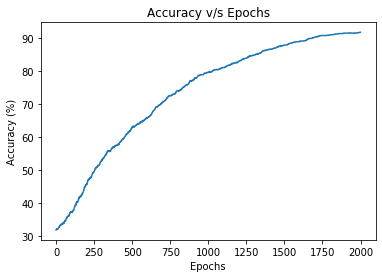

In [27]:
plt.plot(acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy v/s Epochs")